In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using funciones

In [3]:
function η(S::Array{Float64},N::Int64,M::Int64,i::Int64,j::Int64, E::Float64, ΔE, Emin)
    return min(1, exp(S[E - Emin + 1]-S[E - Emin + 1 + ΔE]))
end
function aceptar(S::Array{Float64},N::Int64,M::Int64,i::Int64,j::Int64, E::Float64, ΔE, Emin)
    eta = η(S,N,M,i,j,E,ΔE,Emin)
    #@show alpha
    if rand()<=eta
        return 1
    else
        return 0
    end
end

aceptar (generic function with 1 method)

In [22]:
function wanglandau1(N::Int,M::Int)
    f, N2, Emin = 1, N*M, -2*N*M
    σ = config(N,M)
    E = energia(σ)
    H = zeros(Int,4*N2 + 1)
    S = zeros(4*N2 + 1)
    k=0
    while f > 1e-7
        i,j = rand(1:N),rand(1:M)
        ΔE = -2*energia_ij(σ.conf,N,M,i,j)
    
        if rand() < η(S,N,M,i,j,E,ΔE,Emin)
            E = E + ΔE
            σ.conf = flip_one(σ.conf,i,j)
        end
        
        H[E - Emin + 1] += 1
        S[E - Emin + 1] += f
        k += 1
        if k > 4*N2 && minimum(H[H.!=0])>=0.85*mean(H[H.!=0])
            H[:] = 0
            f *= 0.5 
            k=0
        end
    end
    S
end

wanglandau1 (generic function with 1 method)

In [ ]:
@time wl1=wanglandau1(50,50)
wl1[wl1.!=0]

In [10]:
function Z(T, N, M, wl)
    ZZ = big(0)
    Energias = [-2*M*N:2*M*N]
    SS = wl
    g(SS)=[exp(i) for i in SS] 
    for E in Energias
        ZZ += g(SS)[E-Energias[1]+1]*exp(-β(T)*E)
    end
    ZZ
end

Z (generic function with 2 methods)

elapsed time: 123.712572832 seconds (64891052328 bytes allocated, 43.05% gc time)

In [13]:
@time Z1=Z(5,5,5,wl1)

elapsed time: 0.000251862 seconds (113248 bytes allocated)


5.07802770356243146035612227394501317216384199741870845497083726822277383762939e+169 with 256 bits of precision

In [14]:
log(1)

0.0

In [15]:
F(T,N,M) = -T*log(Z(T,N,M))

F (generic function with 1 method)

In [15]:
function Ebarra(T,N,M,Wl)
    Eprom = big(0)
    Emin, Emax = -2*N*M, 2*N*M
    Energias = [Emin:Emax]
    for E in Energias
        Eprom += E*exp(-β(T)*E)
    end
    Eprom/Z(T,N,M,Wl)
end

Ebarra (generic function with 1 method)

In [16]:
N, M = 5, 5
Ts = [0.01:0.5:5.01]
out1 = zeros(length(Ts))
for T in 1:length(Ts)
    out1[T] = Ebarra(T,N,M,wl1)
end

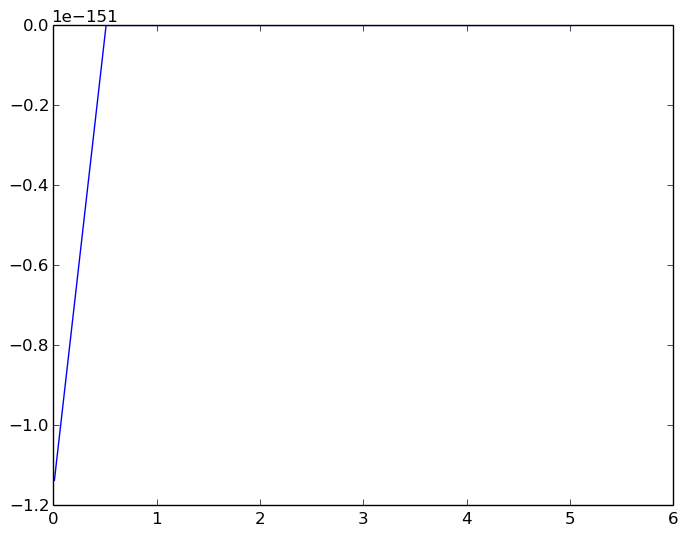

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff6d26c2890>

In [17]:
plot(Ts,out1)

In [18]:
out1

11-element Array{Float64,1}:
 -1.1372e-151 
 -1.6847e-158 
 -2.40222e-161
 -8.26654e-163
 -1.08837e-163
 -2.83627e-164
 -1.09411e-164
 -5.39219e-165
 -3.12665e-165
 -2.02993e-165
 -1.42978e-165

In [17]:
@time S3=wanglandau(2048,2048)
S3[S3.!=0]

elapsed time: 458.938343951 seconds (116232987072 bytes allocated, 14.75% gc time)


206256-element Array{Float64,1}:
  1.0
  5.0
  6.0
 20.0
 23.0
 24.0
 22.0
 24.0
 14.0
 23.0
 21.0
 22.0
 20.0
  ⋮  
 16.0
 14.0
 18.0
 17.0
 16.0
 14.0
 16.0
  8.0
  5.0
  2.0
  3.0
  3.0

In [20]:
z10 = Z(10,50,50)

1.474941294030095000021539377981498862254438259745985335670066011382704471745269e+218 with 256 bits of precision

In [21]:
log(z10)

5.023521684610441123640241553769232355816049144057300506391295721619492420447374e+02 with 256 bits of precision

In [36]:
TT=[10:0.1:15]
ZZ=[log(Z(T,50,50)) for T in TT];

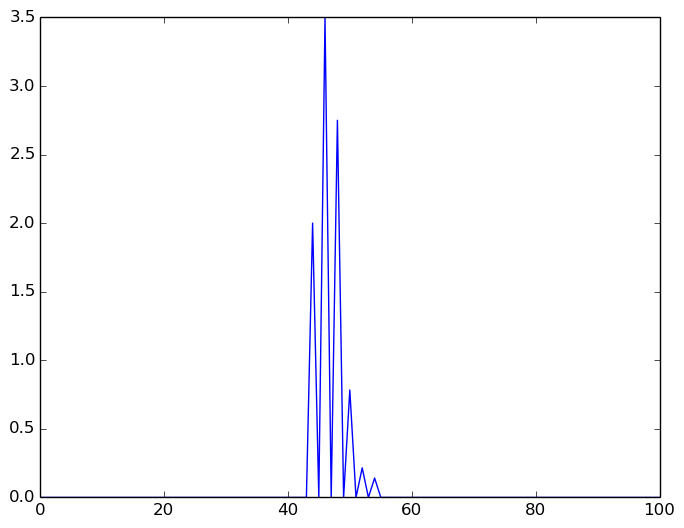

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe3b2cb94d0>

In [51]:
plot(SS)

In [35]:
ZZ

51-element Array{Any,1}:
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
   ⋮
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf
 inf